In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import os,sys
import numpy as np
import h5py
import hdf5storage
from flowtracks.trajectory import Trajectory
from flowtracks.io import trajectories_ptvis, save_particles_table, trajectories_table

In [2]:
from flowtracks.io import trajectories_ptvis, save_particles_table, trajectories_table

In [3]:
os.getcwd()

'C:\\Users\\alex\\Desktop\\og\\PTV_SYN\\python'

In [5]:
res_dir = '../JHU/res/ptv_is.%d'
data = trajectories_ptvis(res_dir,10020,10075,100,xuap=False,traj_min_len=5)

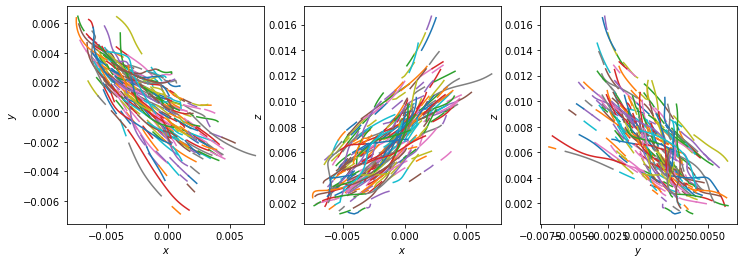

In [6]:
fig,ax = plt.subplots(1,3,figsize=(12,4))
for tr in data:
    ax[0].plot(tr.pos()[:,0],tr.pos()[:,1])
    ax[0].set_xlabel('$x$')
    ax[0].set_ylabel('$y$')
    ax[1].plot(tr.pos()[:,0],tr.pos()[:,2])
    ax[1].set_xlabel('$x$')
    ax[1].set_ylabel('$z$')
    ax[2].plot(tr.pos()[:,1],tr.pos()[:,2])
    ax[2].set_xlabel('$y$')
    ax[2].set_ylabel('$z$')

Text(0.5, 0, '$z$')

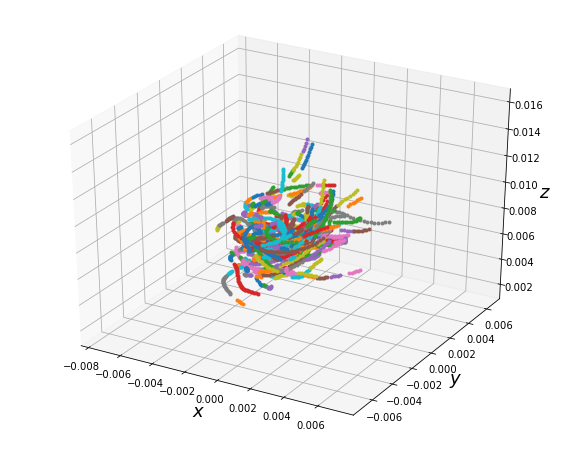

In [7]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

for traj in data:
    ax.plot(traj.pos()[:,0], traj.pos()[:,1], traj.pos()[:,2], '.')

ax.set_xlabel('$x$',fontsize=18)
ax.set_ylabel('$y$',fontsize=18)
ax.set_zlabel('$z$',fontsize=18)

In [21]:
save_particles_table('JHUtraj.h5',data)

Text(0.5, 0, '$z$')

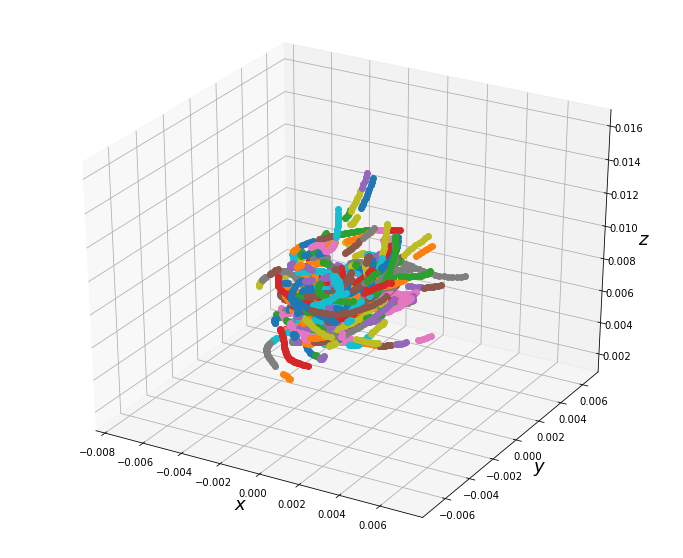

In [22]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
for tr in data: # generate one trajectory per loop call
    plt.plot(tr.pos()[:,0],tr.pos()[:,1],tr.pos()[:,2], '-o')
    
ax.set_xlabel('$x$',fontsize=18)
ax.set_ylabel('$y$',fontsize=18)
ax.set_zlabel('$z$',fontsize=18)

In [12]:
def plot_vel_pdfs(traj_list, fit_gaussian=True, bins=100, bin_range=None):
    '''
    will generate a pdf of trajectory vecolicties and if specified 
    by (fit_gaussian = True) will fit a gaussian to the data
    '''
    vx,vy,vz = [],[],[]
    M = -1.0
    for i in traj_list:
        v = i.velocity()
        for j in range(v.shape[0]):
            vx.append(v[j,0])
            vy.append(v[j,1])
            vz.append(v[j,2])
        if np.amax(np.abs(v)) > M:
            M = np.amax(np.abs(v))
    
    if bin_range==None:
        bin_range=(-M,M)
    
    fig, ax = plt.subplots()
    c = ['b','r','g']
    shp = ['o','d','v']
    lbl = [r'$v_x$',r'$v_y$',r'$v_z$']
    
    for e,i in enumerate([vx,vy,vz]):
        h = np.histogram(i,bins=bins, normed = True, range=bin_range)
        x,y = 0.5*(h[1][:-1] + h[1][1:]), h[0]
        m,s = np.mean(i), np.std(i)
        xx = np.arange(-M,M,2.0*M/500)
        ax.plot(x,y,c[e]+shp[e]+'-',lw=0.4,
                label=lbl[e]+r' $\mu = %.3f$ $\sigma = $%0.3f'%(m,s))
        if fit_gaussian:
            ax.plot(xx, gaussian(xx, m, s), c[e], lw = 1.2)
    ax.legend()
    ax.set_xlabel(r'$v$')
    ax.set_ylabel(r'P($v$)')
    return fig, ax
    
  
          
def gaussian(x,m,s):
    return 1.0/np.sqrt(2*np.pi)/s * np.exp(-0.5 * ((x-m)/s)**2)





def plot_pos_pdfs(traj_list):
    '''
    will generate a pdf of trajectory positions    
    '''
    px,py,pz = [],[],[]
    for i in traj_list:
        p = i.pos()
        for j in range(p.shape[0]):
            px.append(p[j,0])
            py.append(p[j,1])
            pz.append(p[j,2])
    fig, ax = plt.subplots()
    c = ['b','r','g']
    shp = ['o','d','v']
    lbl = [r'$x$',r'$y$',r'$z$']
    for e,i in enumerate([px,py,pz]):
        h = np.histogram(i,bins=100)
        x,y = 0.5*(h[1][:-1] + h[1][1:]), h[0]
        m,s = np.mean(i), np.std(i)
        xx = np.arange(-2.5,2.5,0.01)
        ax.plot(x,y,c[e]+shp[e]+'-',lw=0.4, label=lbl[e]+r' $\sigma = $%0.3f'%s)
    ax.legend()
    ax.set_xlabel(r'$x_i$')
    ax.set_ylabel(r'P($x_i$)')
    return fig, ax

In [92]:
# # Using the First function
# plot_vel_pdfs(data, fit_gaussian=True, bins=100, bin_range=None)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f82e6c1978>)

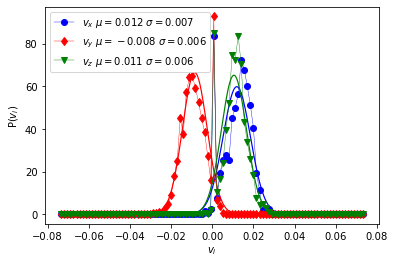

In [19]:
def plot_vel_pdfs(traj_list, fit_gaussian=True, bins=100, bin_range=None):
    '''
    will generate a pdf of trajectory vecolicties and if specified 
    by (fit_gaussian = True) will fit a gaussian to the data
    '''
    vx,vy,vz = [],[],[]
    M = -1.0
    for i in traj_list:
        v = i.velocity()
        for j in range(v.shape[0]):
            vx.append(v[j, 0])
            vy.append(v[j, 1])
            vz.append(v[j, 2])
        if np.amax(np.abs(v)) > M:
            M = np.amax(np.abs(v))
    
    if bin_range==None:
        bin_range=(-M,M)
    
    fig, ax = plt.subplots()
    c = ['b','r','g']
    shp = ['o','d','v']
    lbl = [r'$v_x$',r'$v_y$',r'$v_z$']
    
    for e,i in enumerate([vx, vy, vz]):
        h = np.histogram(i, bins=bins, density=True, range=bin_range)
        x,y = 0.5*(h[1][:-1] + h[1][1:]), h[0]
        m,s = np.mean(i), np.std(i)
        xx = np.arange(-M,M,2.0*M/500)
        ax.plot(x,y,c[e]+shp[e]+'-',lw=0.4,
                label = lbl[e]+r' $\mu = %.3f$ $\sigma = $%0.3f'%(m,s))
        if fit_gaussian:
            ax.plot(xx, gaussian(xx, m, s), c[e], lw = 1.2)
        
    ax.legend()
    ax.set_xlabel(r'$v_i$')
    ax.set_ylabel(r'P($v_i$)')
    
    return fig, ax
plot_vel_pdfs(data)

In [26]:
def trajectories_mat_h5py(fname):
    """
    Extracts all trajectories from a Matlab file. the file is formated as a 
    list of trajectory record arrays, containing attributes 'xf', 'yf', 'zf'
    for position, 'uf', 'vf', 'wf' for velocity, and 'axf', 'ayf', 'azf' for
    acceleration.

    Modified by Alex Liberzon for v7.3 MAT files that cannot be loaded by
    scipy.io.loadmat but nicely by h5py:


        trajects = trajectories_mat_h5py(fname)


    Arguments:
    fname - path to the Matlab file.

    Returns:
    trajects - a list of :class:`~flowtracks.trajectory.Trajectory` objects,
        one for each trajectory contained in the mat file.
    """

    with h5py.File(os.path.expanduser(fname),'r+') as f:

        # Get the workspace variable holding the trajectories:
        data_name = [s for s in f.keys() \
            if (not s.startswith('__')) and (not s == '#refs#')][0]
        # raw = np.hstack(data[data_name][0])

        ref = f[data_name] # reference only

        trajects = []
        
        # horizontal or vertical structure:
        
        if np.argmax(ref['t'].shape) == 0:
        
            for i in range(ref['t'].shape[0]):
                # also convert data from mm to m.
                pos = np.vstack((f[ref['xf'][i][0]][()],f[ref['yf'][i][0]][()],f[ref['zf'][i][0]][()])).T
                vel = np.vstack((f[ref['uf'][i][0]][()],f[ref['vf'][i][0]][()],f[ref['wf'][i][0]][()])).T
                accel = np.vstack((f[ref['axf'][i][0]][()],f[ref['ayf'][i][0]][()],f[ref['azf'][i][0]][()])).T
                t = f[ref['t'][i][0]][()].squeeze()
                trajid = f[ref['trajid'][i][0]][()][0]
                trajects.append(Trajectory(pos, vel, t, trajid, accel=accel))
        
        else:
        
            for i in range(ref['t'].shape[-1]):
                # also convert data from mm to m.
                pos = np.vstack((f[ref['xf'][0][i]][()],f[ref['yf'][0][i]][()],f[ref['zf'][0][i]][()])).T
                vel = np.vstack((f[ref['uf'][0][i]][()],f[ref['vf'][0][i]][()],f[ref['wf'][0][i]][()])).T
                accel = np.vstack((f[ref['axf'][0][i]][()],f[ref['ayf'][0][i]][()],f[ref['azf'][0][i]][()])).T
                t = f[ref['t'][0][i]][()].squeeze()
                trajid = f[ref['trajid'][0][i]][()][0]
                trajects.append(Trajectory(pos, vel, t, trajid, accel=accel))
    
    return trajects

In [29]:
trajects_GT = trajectories_mat_h5py('traj_GT.mat')

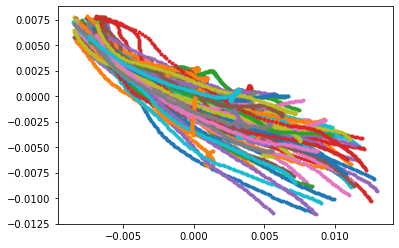

In [30]:
for traj in trajects_GT:
    # traj is a Trajectory object, supplied by the
    # flowtracks.trajectory module.
    plt.plot(traj.pos()[:,0], traj.pos()[:,1], '.')

plt.show()

Ground Truth PDF

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f836b26e80>)

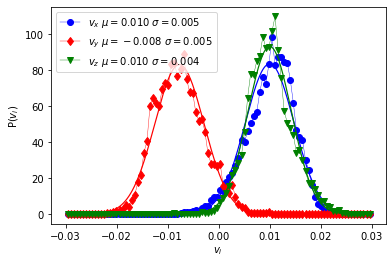

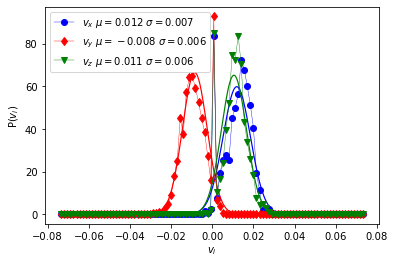

In [91]:
plot_vel_pdfs(trajects_GT)
plot_vel_pdfs(data)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f83682dda0>)

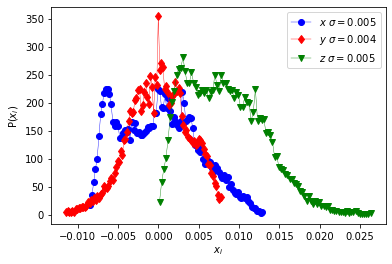

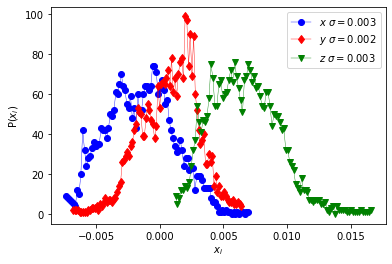

In [83]:
plot_pos_pdfs(trajects_GT)
plot_pos_pdfs(data)

In [58]:
print('number of reconstruction trajectories = '+ str(len(data)))
print('number of Ground Truth trajectories = ' + str(len(trajects_GT)))

number of reconstruction trajectories = 366
number of Ground Truth trajectories = 100
